#### The Real Problem

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

#### Business Domain Value

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

#### Project Description

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

Pre-Processing, Data Visualization and EDA 

● Exploring the given Data files ● Understanding the structure of data ● Missing points in data ● Finding inconsistencies in the data ● Visualizing different patterns ● Visualizing different text features ● Dealing with missing values ● Text preprocessing ● Creating word vocabulary from the corpus of report text data ● Creating tokens as required 

Model Building 

 Building a model architecture which can classify.  Trying different model architectures by researching state of the art for similar tasks.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

Test the Model, Fine-tuning and Repeat 

● Test the model and report as per evaluation metrics ● Try different models ● Try different evaluation metrics ● Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them ● Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Import necessary libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings("ignore")

## Pre-Processing, Data Visualization and EDA

### Loading and Exploring Data File

In [55]:
!pip install openpyxl

In [56]:
read_file = pd.read_excel ("input_data.xlsx", engine='openpyxl')
read_file.to_csv ("input_data.csv", index = None, header=True)
df = pd.read_csv("input_data.csv", encoding='utf-8')

In [57]:
#check the head of the dataset
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [58]:
#check the tail of the dataset
df.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


### Understanding Structure of Data

In [59]:
df.shape

(8500, 4)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


#### Inferences


* This is a multi class classification Problem.
* Features are 'Description' , 'Short Description' and 'Caller' with Taget Variable is 'Assignment Group'having multipl classes.
* There are 4 columns - all of string format.
* There are 8500 rows - Few proportion of missing values can be observed in Description and Short Description.
* There are multiple languages used in description and short description and this needs to handled in pre processing.

#### Dropping Feature 'Caller' as this is unique and wont be useful for modeling

In [61]:
df_incidents = df.drop('Caller',axis=1)

In [62]:
# Reviewing number of unique values in target class 'Assignment Group'
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Target Variable - 'Assignment Group' has 74 different classes

In [63]:
# Reviewing number of tickets on each class
df_incidents['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_62      25
GRP_48      25
GRP_23      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_68       3
GRP_63       3
GRP_38       3
GRP_58       3
GRP_56       3
GRP_57       2
GRP_54       2
GRP_69       2
GRP_71    

In [64]:
# Reviewing Proportions for Top 10 Groups based on incident
df_incidents['Assignment group'].value_counts(normalize = True).head(10)

GRP_0     0.467765
GRP_8     0.077765
GRP_24    0.034000
GRP_12    0.030235
GRP_9     0.029647
GRP_2     0.028353
GRP_19    0.025294
GRP_3     0.023529
GRP_6     0.021647
GRP_13    0.017059
Name: Assignment group, dtype: float64

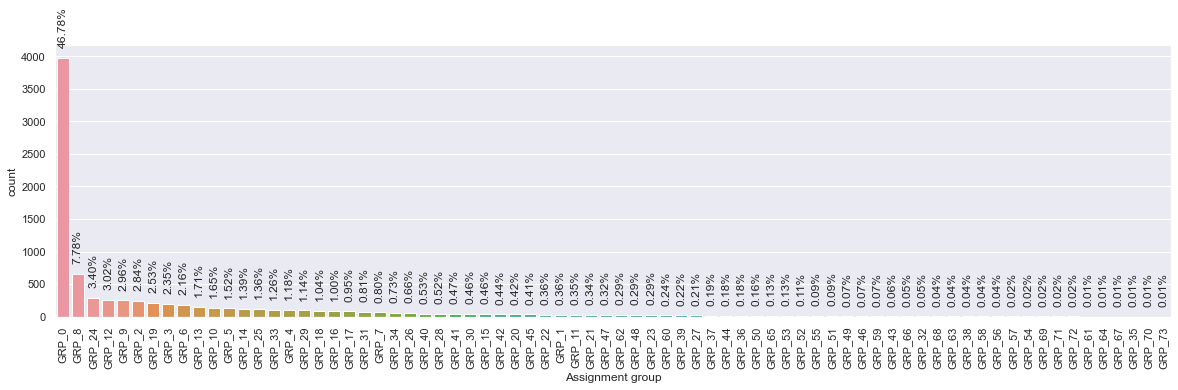

In [65]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### Inferences


* This is a imbalanced dataset, with majority of incidents are from Group 0 - 47%
* There are few classes which just have less incidents - To build an effective model, we need to have siginificant number of incidents (we may need to drop classes having less incidents - say less than 100 tickets)

#### Lets review distribution of tickets across various bins 

In [66]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


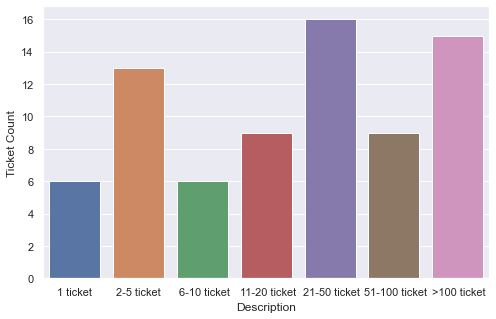

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Description", y="Ticket Count", data=df_bins);

#### Inferences


* There are 6 Assignment groups with only 1 ticket
* There are 13 assignemnt groups with only 13 ticket
* There are 6 Assignment group between 6-10 ticket
* Only 20% of Assignment Groups have more than 100 tickets

In [68]:
df_incidents_level = df_incidents.copy()

In [69]:
df_incidents_level.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


### Insights on Tickets based on Teams - L1/L2 vs L3/Functional

Based on analysis on descriptions/short description it can bse observed that 'Group 0' belong to L1/L2 tickets and rest belongs to L3/Functional tickets 

In [70]:
df_incidents_level.loc[df_incidents_level['Assignment group'] != 'GRP_0','Incident_Type'] = 'L3/Functional'
df_incidents_level.loc[df_incidents_level['Assignment group'] == 'GRP_0','Incident_Type'] = 'L1/L2'

In [71]:
df_incidents_level.head()

,Short description,Description,Assignment group,Incident_Type
0,login issue,-verified user details.(employee# & manager na...,GRP_0,L1/L2
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,L1/L2
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,L1/L2
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,L1/L2
4,skype error,skype error,GRP_0,L1/L2


In [72]:
df_incidents_level['Incident_Type'].value_counts(normalize = 'True')

L3/Functional    0.532235
L1/L2            0.467765
Name: Incident_Type, dtype: float64

<AxesSubplot:xlabel='Incident_Type', ylabel='count'>

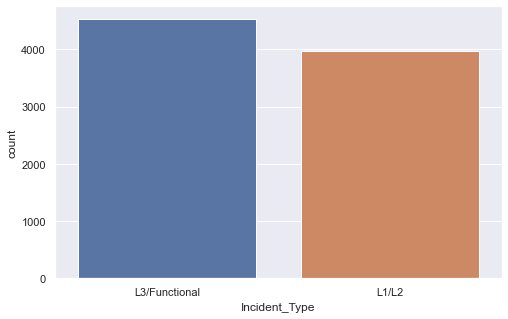

In [73]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
sns.countplot(x="Incident_Type", data=df_incidents_level, order=df_incidents_level["Incident_Type"].value_counts().index)

#### Inferences


* Proportion of L1/L2 tickets is ~47%
* Proportion of L3/Functional tickets is ~53%

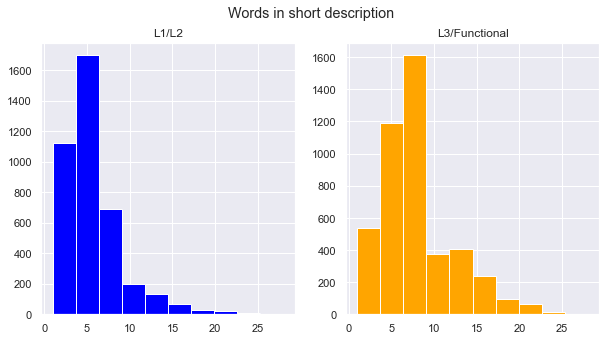

In [74]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Incident_Type']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='blue')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Incident_Type']=='L3/Functional']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='orange')
ax2.set_title('L3/Functional')
fig.suptitle('Words in short description')
plt.show()

It can be observed that L3/Functional tickets will have more words in short description compared to L1/L2 tickets

### Handling Missing Values

In [75]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


There are 8 null values for 'Short Description' and 1 null value for 'Description'

In [76]:
df_incidents[df_incidents['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,GRP_0


In [77]:
df_incidents[df_incidents['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


Lets replace Null with empty values and join 'Description' and 'Short Description' and create a ne feature 'New Description'

In [78]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [79]:
df_incidents.shape

(8500, 3)

In [80]:
df_incidents[df_incidents.duplicated(keep = 'last')].count()

Short description    591
Description          591
Assignment group     591
dtype: int64

In [81]:
df_incidents.drop_duplicates(inplace=True)

In [82]:
df_incidents.shape

(7909, 3)

In [83]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [84]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


In [85]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7909 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  7909 non-null   object
 1   Description        7909 non-null   object
 2   Assignment group   7909 non-null   object
 3   New_Description    7909 non-null   object
dtypes: object(4)
memory usage: 308.9+ KB


Now there are no missing values

It can be observed that there are descriptions in multiple languages. Lets anlayse different languages used

In [86]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
    try:                                                          
        return detect(df)                                      
    except:                                                       
        return 'no'                                                  

df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)

In [87]:
df_incidents["language"].value_counts()

en    6682
de     384
af     165
it      92
fr      87
sv      80
da      73
no      72
nl      68
ca      45
es      37
pl      27
pt      24
sq      10
tl      10
ro       9
cy       7
hr       6
sl       6
fi       5
id       5
tr       3
so       3
et       3
cs       2
lt       2
lv       1
sk       1
Name: language, dtype: int64

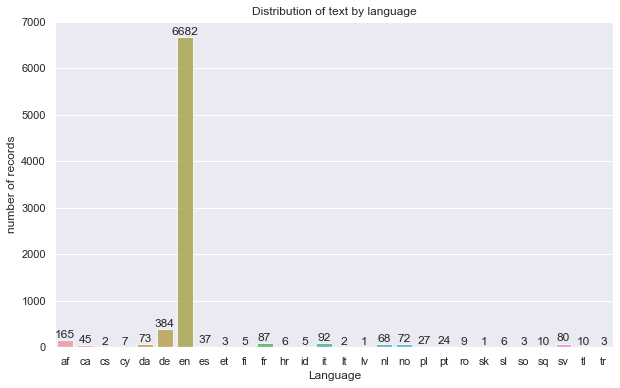

In [88]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [89]:
import googletrans
from googletrans import Translator

In [90]:
# Function to translate the text to english.
def fn_translate(df,lang):
    try:
        if lang == 'en':
            return df
        else:
            return translator.translate(df).text
    except:
        return df
    
    
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

In [91]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


In [92]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


In [93]:
import string
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

In [94]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace('_x000D_','')    
    text=text.replace('?','')
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'[a-zA-Z0-9]+@[a-zA-Z0-9]+\.[^ ]+', '', text)
    text = re.sub(r'[^ ]+\..*\.[^ ]+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text

In [95]:
df_incidents['Cleaned_Text'] = df_incidents['New_Description'].apply(lambda x: clean_text(x))

In [96]:
df_incidents['Cleaned_Text'] = df_incidents['Cleaned_Text'].apply(lambda s: " ".join(s.split()))

In [97]:
df_incidents.drop(df_incidents[df_incidents['Cleaned_Text'].apply(lambda x: len(x) < 2)].index, inplace = True)

In [98]:
from langdetect import detect
df_incidents.drop(df_incidents[df_incidents['Cleaned_Text'].apply(lambda x: detect(x) != 'en')].index, inplace = True)

In [99]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description,Cleaned_Text
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...,login issue verified user detailsemployee mana...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook hmjdrvpb teammy meetingsskype meetings...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn eylqgodm cannot log on to vpn
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in to engineering tool and skype...,en,unable to log in to engineering tool and skype...,unable to log in to engineering tool and skype...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...,en,ticket_no1550391- employment status - new non-...,employment status new nonemployee employment s...


In [100]:
!pip install nltk --quiet

In [101]:
!python -m nltk.downloader stopwords

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
df_incidents.shape

(6398, 7)

In [103]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df_incidents['Cleaned_Text'] = df_incidents['Cleaned_Text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_incidents['Cleaned_Text'].head()

0    login issue verified user detailsemployee mana...
1    outlook hmjdrvpb teammy meetingsskype meetings...
2                 cant log vpn eylqgodm cannot log vpn
5    unable log engineering tool skype unable log e...
7    employment status new nonemployee employment s...
Name: Cleaned_Text, dtype: object

In [104]:
!pip install textblob --quiet

In [105]:
!python -m nltk.downloader wordnet

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [106]:
!python -m nltk.downloader omw-1.4

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [107]:
## Lemmatization
from textblob import Word
import nltk
df_incidents['Cleaned_Text']= df_incidents['Cleaned_Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df_incidents['Cleaned_Text'].head()

0    login issue verified user detailsemployee mana...
1    outlook hmjdrvpb teammy meetingsskype meeting ...
2                 cant log vpn eylqgodm cannot log vpn
5    unable log engineering tool skype unable log e...
7    employment status new nonemployee employment s...
Name: Cleaned_Text, dtype: object

In [108]:
# Defining WorkCloud function
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

In [109]:
!pip install wordcloud --quiet

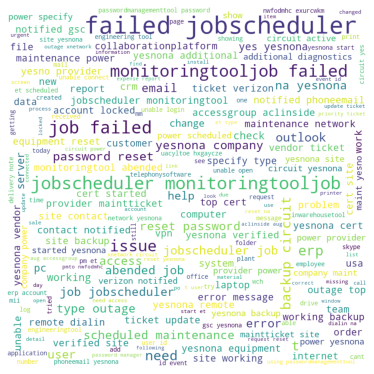

In [110]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_incidents['Cleaned_Text'])
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

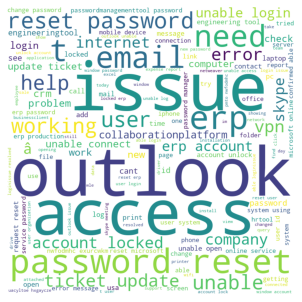

In [111]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (4, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

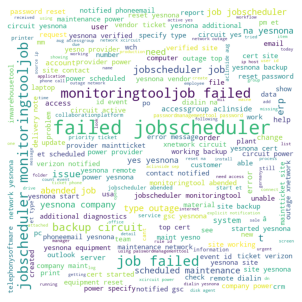

In [112]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']!='GRP_0'].Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (4, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [113]:
!pip install Counter --quiet

In [114]:
import string
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

In [115]:
wd_counts = Counter()
for i, row in df_incidents.iterrows():
    wd_counts.update(row['Cleaned_Text'].split())
    
wd_counts.most_common(20)

[('jobscheduler', 1881),
 ('failed', 1672),
 ('yesnona', 1568),
 ('password', 1412),
 ('erp', 1268),
 ('user', 1255),
 ('job', 1176),
 ('t', 1098),
 ('issue', 983),
 ('reset', 962),
 ('unable', 931),
 ('access', 923),
 ('account', 768),
 ('monitoringtooljob', 765),
 ('site', 759),
 ('company', 757),
 ('need', 724),
 ('error', 693),
 ('power', 666),
 ('ticket', 664)]

In [116]:
!pip install sklearn --quiet

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdIdfVec = TfidfVectorizer(min_df=5, use_idf=True, stop_words=None,lowercase=False)

In [118]:
text = tdIdfVec.fit_transform(df_incidents.Cleaned_Text)

In [119]:
tf_matrix = text.toarray()

In [120]:
vocab = tdIdfVec.get_feature_names()

In [121]:
tf_df = pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)

In [122]:
tf_df.head()

abap  abend  abended  ability  able  aborted  absolutely  accept  \
0   0.0    0.0      0.0      0.0  0.17      0.0         0.0     0.0   
1   0.0    0.0      0.0      0.0  0.00      0.0         0.0     0.0   
2   0.0    0.0      0.0      0.0  0.00      0.0         0.0     0.0   
3   0.0    0.0      0.0      0.0  0.00      0.0         0.0     0.0   
4   0.0    0.0      0.0      0.0  0.00      0.0         0.0     0.0   

   accepting  acces  access  accessgroup  accessing  account  accountadvised  \
0        0.0    0.0     0.0          0.0        0.0      0.0             0.0   
1        0.0    0.0     0.0          0.0        0.0      0.0             0.0   
2        0.0    0.0     0.0          0.0        0.0      0.0             0.0   
3        0.0    0.0     0.0          0.0        0.0      0.0             0.0   
4        0.0    0.0     0.0          0.0        0.0      0.0             0.0   

   accounting  acct  ack  aclinside  across  action  activate  activated  \
0         0.0   0.0  0.0        0.0     0.0     0.0       0.0        0.0   
1         0.0   0.0  0.0        0.0     0.0     0.0       0.0        0.0   
2         0.0   0.0  0.0        0.0     0.0     0.0       0.0        0.0   
3         0.0   0.0  0.0        0.0     0.0     0.0       0.0        0.0   
4         0.0   0.0  0.0        0.0     0.0     0.0       0.0        0.0   

   activation  active  activesync  activity  actual    ad  adapter  add  \
0         0.0     0.0         0.0       0.0     0.0  0.23      0.0  0.0   
1         0.0     0.0         0.0       0.0     0.0  0.00      0.0  0.0   
2         0.0     0.0         0.0       0.0     0.0  0.00      0.0  0.0   
3         0.0     0.0         0.0       0.0     0.0  0.00      0.0  0.0   
4         0.0     0.0         0.0       0.0     0.0  0.00      0.0  0.0   

   added  addin  adding  addition  additional  address  addressed  admin  \
0    0.0    0.0     0.0       0.0         0.0      0.0        0.0    0.0   
1    0.0    0.0     0.0       0.0         0.0      0.0        0.0    0.0   
2    0.0    0.0     0.0       0.0         0.0      0.0        0.0    0.0   
3    0.0    0.0     0.0       0.0         0.0      0.0        0.0    0.0   
4    0.0    0.0     0.0       0.0         0.0      0.0        0.0    0.0   

   administration  administrator  adobe  advance  advice  advise  advised  \
0             0.0            0.0    0.0      0.0     0.0     0.0      0.0   
1             0.0            0.0    0.0      0.0     0.0     0.3      0.0   
2             0.0            0.0    0.0      0.0     0.0     0.0      0.0   
3             0.0            0.0    0.0      0.0     0.0     0.0      0.0   
4             0.0            0.0    0.0      0.0     0.0     0.0      0.0   

    ae  aerp  affected  africa  afternoon  afternooni  agent  agentid  ago  \
0  0.0   0.0       0.0     0.0        0.0         0.0    0.0      0.0  0.0   
1  0.0   0.0       0.0     0.0        0.0         0.0    0.0      0.0  0.0   
2  0.0   0.0       0.0     0.0        0.0         0.0    0.0      0.0  0.0   
3  0.0   0.0       0.0     0.0        0.0         0.0    0.0      0.0  0.0   
4  0.0   0.0       0.0     0.0        0.0         0.0    0.0      0.0  0.0   

   agreement  alert  alerting  allcan  alli  allow  allowed  allowing  allows  \
0        0.0    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0   
1        0.0    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0   
2        0.0    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0   
3        0.0    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0   
4        0.0    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0   

   along  already  also  although  always  amar  amerirtca  amerirtcas  \
0    0.0      0.0   0.0       0.0     0.0   0.0        0.0         0.0   
1    0.0      0.0   0.0       0.0     0.0   0.0        0.0         0.0   
2    0.0      0.0   0.0       0.0     0.0   0.0        0.0         0.0   
3    0.0      0

In [123]:
tf_df.columns

Index(['abap', 'abend', 'abended', 'ability', 'able', 'aborted', 'absolutely',
       'accept', 'accepting', 'acces',
       ...
       'zdsxmcwu', 'zebra', 'zkwfqagb', 'zu', 'zugriff', 'zuxcfonv',
       'zywoxerf', 'zzmails', 'è½', 'ðµð½ð'],
      dtype='object', length=1894)

In [124]:
print(tf_df.shape)

(6398, 1894)


In [125]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_incidents['token_desc'] = df_incidents['Cleaned_Text'].apply(lambda x: tokenizer.tokenize(x))

In [126]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description,Cleaned_Text,token_desc
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...,login issue verified user detailsemployee mana...,"[login, issue, verified, user, detailsemployee..."
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook hmjdrvpb teammy meetingsskype meeting ...,"[outlook, hmjdrvpb, teammy, meetingsskype, mee..."
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log vpn eylqgodm cannot log vpn,"[cant, log, vpn, eylqgodm, cannot, log, vpn]"
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in to engineering tool and skype...,en,unable to log in to engineering tool and skype...,unable log engineering tool skype unable log e...,"[unable, log, engineering, tool, skype, unable..."
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...,en,ticket_no1550391- employment status - new non-...,employment status new nonemployee employment s...,"[employment, status, new, nonemployee, employm..."


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_incidents['Cleaned_Text'])

In [128]:
len(inc_tfidf.todense())

6398

In [129]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [130]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
job,2.868214
jobscheduler,2.911654
failed,3.023378
failed jobscheduler,3.091864
monitoringtooljob,3.122715
jobscheduler monitoringtooljob,3.127950
job failed,3.174971
monitoringtooljob failed,3.197225
issue,3.221425
erp,3.227205


In [131]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
aclinside,7.278990
accessgroup,7.278990
accessgroup aclinside,7.278990
id event,6.050325
host,5.738545
disk,5.686360
priority,5.559204
slow,5.559204
erp account,5.544389
incident,5.529791


In [132]:
#tf-idf array into pandas dataframe
#collect the tfid matrix in numpy array
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.24685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.501109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.60331,0.0,0.0,0.0,0.0,0.292481,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291883,0.339081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628549,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0

In [133]:
df_inc['Assignment_Group'] = df_incidents['Assignment group']

In [134]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve,confusion_matrix, f1_score

In [135]:
from time import time
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return  (time()-self.start_ts)
    
timer = Timer()

# A method to train and test the model
def run_classification(modelType, estimator, X_train, X_test, y_train, y_test, ngram=1, arch_name=None, pipelineRequired=True):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, ngram))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('accuracy %s' % accuracy_score(y_pred, y_test)) 
    print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    #print(timer.stop(), 'to run the model')
    
    dict_results = {"Algorithm": modelType,
                         "Train Accuracy Score": round(metrics.accuracy_score(y_train, y_train_pred.round()) * 100,2),
                         "Test Accuracy Score": round(metrics.accuracy_score(y_test, y_pred.round()) * 100,2),
                         "Train Recall Score":round((metrics.recall_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Recall Score":round((metrics.recall_score(y_test, y_pred.round(),average='weighted')) * 100,2),
                         "Train Precision":round((metrics.precision_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Precision":round((metrics.precision_score(y_test, y_pred.round(),average='weighted')) * 100,2),    
                         "Time Taken in seconds": timer.stop()
                       }
    return pd.Series(dict_results).to_frame().T

In [136]:
# Filtering classes having less than 100 tickets to create an effective model
df_incidents_filtered = df_incidents[df_incidents['Assignment group'].map(df_incidents['Assignment group'].value_counts()) > 100]
x = df_incidents_filtered['Cleaned_Text']
y = df_incidents_filtered['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)
df_score = pd.DataFrame(columns= ['Algorithm', "Train Accuracy Score", "Test Accuracy Score", "Train Recall Score", "Test Recall Score", "Train Precision", "Test Precision","Time Taken in seconds"])

In [137]:
df_score = pd.concat([df_score,run_classification('Naive_Bayes',MultinomialNB(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 66.63%
Testing accuracy: 66.50%
accuracy 0.6650099403578529
f1 score 0.7804578579362346
Confusion matrix:
 [[526   0   0   0   0   0   0   0   0   0   1   0]
 [ 16   0   0   0   0   0   0   0   0   0  11   0]
 [ 25   0  13   0   0   0   0   0   0   0   6   0]
 [ 27   0   0   0   0   0   0   0   0   0   1   0]
 [ 19   0   0   0   0   0   0   0   0   0   3   0]
 [ 38   0   0   0   0   0   0   0   0   0   0   0]
 [ 42   0   0   0   0   0   4   0   0   0   0   0]
 [ 36   0   0   0   0   0   1   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  9   0   0   0   0   0   0   0   0   1  26   0]
 [  4   0   0   0   0   0   0   0   0   0 123   0]
 [ 13   0   0   0   0   0   0   0   0   0  34   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       52

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459


In [138]:
df_score = pd.concat([df_score,run_classification('KNN',KNeighborsClassifier(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 74.73%
Testing accuracy: 70.28%
accuracy 0.7027833001988072
f1 score 0.7666465242888161
Confusion matrix:
 [[514   0   3   1   0   0   1   3   0   1   3   1]
 [ 10   6   0   1   0   0   0   0   0   0  10   0]
 [ 18   0  18   0   1   0   0   1   0   0   6   0]
 [ 18   0   0   7   0   0   0   0   0   2   1   0]
 [ 12   0   1   0   6   0   0   0   0   0   3   0]
 [ 35   0   0   0   0   1   0   2   0   0   0   0]
 [ 29   1   0   0   0   0  15   1   0   0   0   0]
 [ 27   0   0   0   0   2   3   5   0   0   0   0]
 [  2   0   0   0   0   0   0   0   1   0  22   0]
 [  3   0   0   0   0   0   0   0   0   8  25   0]
 [  3   0   3   0   1   0   0   0   0   0 120   0]
 [ 10   0   0   0   0   0   0   0   0   0  33   6]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85  

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991


In [139]:
df_score = pd.concat([df_score,run_classification('SVC',LinearSVC(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 89.61%
Testing accuracy: 72.17%
accuracy 0.7216699801192843
f1 score 0.7586499750105071
Confusion matrix:
 [[490   0   4   2   3   6   8  10   0   2   1   1]
 [  6   8   0   2   0   0   1   0   0   0  10   0]
 [  9   0  25   0   2   0   0   2   0   0   6   0]
 [ 10   0   0  14   0   0   1   0   0   2   1   0]
 [ 11   0   1   0   5   0   0   0   0   0   5   0]
 [ 28   0   0   1   0   7   0   2   0   0   0   0]
 [ 17   1   2   0   0   0  24   2   0   0   0   0]
 [ 22   0   0   0   0   4   3   8   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  1   0   0   1   0   0   0   0   0   9  25   0]
 [  2   0   1   0   1   0   0   0   0   0 123   0]
 [  5   0   0   0   0   0   0   0   0   0  31  13]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       527
  

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571


In [140]:
df_score = pd.concat([df_score,run_classification('Decision Tree',DecisionTreeClassifier(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 91.03%
Testing accuracy: 66.70%
accuracy 0.6669980119284294
f1 score 0.690009517001935
Confusion matrix:
 [[441   5  10   5   3  21  13  20   3   3   2   1]
 [  4   6   0   4   0   0   1   0   1   1  10   0]
 [  8   0  27   0   0   1   0   1   0   1   6   0]
 [  6   1   0  14   2   0   1   0   0   3   1   0]
 [  7   0   3   0   2   1   0   0   1   1   7   0]
 [ 20   0   1   2   0  10   1   4   0   0   0   0]
 [ 20   0   2   1   0   2  19   2   0   0   0   0]
 [ 17   1   2   0   0   2   1  14   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0  24   0]
 [  1   0   0   3   0   0   0   0   0   7  25   0]
 [  2   0   3   0   1   1   0   0   0   0 120   0]
 [  5   0   2   0   0   1   0   0   0   0  31  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83 

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133


In [141]:
df_score = pd.concat([df_score,run_classification('Random Forest',RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 91.03%
Testing accuracy: 71.27%
accuracy 0.7127236580516899
f1 score 0.7740919638663559
Confusion matrix:
 [[515   0   3   1   2   0   1   3   0   2   0   0]
 [ 12   3   0   2   0   0   0   0   0   0  10   0]
 [ 17   0  20   0   0   0   0   0   0   0   7   0]
 [ 14   0   0  11   0   0   0   0   0   2   1   0]
 [ 10   0   1   0   4   0   0   0   0   0   7   0]
 [ 34   0   0   0   0   3   0   1   0   0   0   0]
 [ 30   0   2   0   0   0  14   0   0   0   0   0]
 [ 22   0   0   0   0   1   2  12   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  1   0   0   2   0   0   0   0   0   8  25   0]
 [  3   0   2   0   1   0   0   0   0   0 121   0]
 [ 12   0   0   0   0   0   0   0   0   0  31   6]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332


In [142]:
def run_classification_bi(modelType, estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('accuracy %s' % accuracy_score(y_pred, y_test)) 
    print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    #print(timer.stop(), 'to run the model')
    
    dict_results = {"Algorithm": modelType,
                         "Train Accuracy Score": round(metrics.accuracy_score(y_train, y_train_pred.round()) * 100,2),
                         "Test Accuracy Score": round(metrics.accuracy_score(y_test, y_pred.round()) * 100,2),
                         "Train Recall Score":round((metrics.recall_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Recall Score":round((metrics.recall_score(y_test, y_pred.round(),average='weighted')) * 100,2),
                         "Train Precision":round((metrics.precision_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Precision":round((metrics.precision_score(y_test, y_pred.round(),average='weighted')) * 100,2),    
                         "Time Taken in seconds": timer.stop()
                       }
    return pd.Series(dict_results).to_frame().T

In [143]:
df_score = pd.concat([df_score,run_classification('SVC_bi',LinearSVC(), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])
Training accuracy: 90.85%
Testing accuracy: 74.45%
accuracy 0.7445328031809145
f1 score 0.7802766682189026
Confusion matrix:
 [[502   0   5   2   2   2   4   6   0   2   1   1]
 [  6   8   0   2   0   0   1   0   0   0  10   0]
 [  9   0  26   0   1   0   0   1   0   0   7   0]
 [  8   0   0  16   0   0   1   0   0   2   1   0]
 [ 10   0   1   0   7   0   0   0   0   0   4   0]
 [ 26   0   0   0   0  10   0   2   0   0   0   0]
 [ 20   1   2   0   0   0  23   0   0   0   0   0]
 [ 17   0   0   0   0   4   3  13   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  1   0   0   1   0   0   0   0   0   9  25   0]
 [  2   0   1   0   1   0   0   0   0   0 123   0]
 [  4   1   0   0   0   1   0   0   0   0  31  12]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.95     

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699


In [144]:
df_score = pd.concat([df_score,run_classification('SVC_tri',LinearSVC(), X_train, X_test, y_train, y_test, ngram=3)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])
Training accuracy: 90.90%
Testing accuracy: 74.45%
accuracy 0.7445328031809145
f1 score 0.781941980635258
Confusion matrix:
 [[503   0   5   2   1   2   4   6   0   2   1   1]
 [  7   7   0   2   0   0   1   0   0   0  10   0]
 [ 11   0  26   0   0   0   0   0   0   0   7   0]
 [  8   0   0  17   0   0   0   0   0   2   1   0]
 [ 10   0   1   0   7   0   0   0   0   0   4   0]
 [ 27   0   0   0   0  10   0   1   0   0   0   0]
 [ 20   1   2   0   0   0  23   0   0   0   0   0]
 [ 16   0   1   0   0   4   3  13   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  1   0   0   1   0   0   0   0   0   9  25   0]
 [  2   0   1   0   1   0   0   0   0   0 123   0]
 [  5   1   0   0   0   1   0   0   0   0  31  11]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.95      

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699
0,SVC_tri,90.9,74.45,90.9,74.45,94.45,74.0,0.614218


In [145]:
df_score = pd.concat([df_score,run_classification('Random Forest_tri',RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test, ngram=3)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 91.05%
Testing accuracy: 70.58%
accuracy 0.705765407554672
f1 score 0.7798051852493231
Confusion matrix:
 [[523   0   0   0   1   0   1   1   0   1   0   0]
 [ 14   2   0   1   0   0   0   0   0   0  10   0]
 [ 19   0  19   0   0   0   0   0   0   0   6   0]
 [ 17   0   0   8   0   0   0   0   0   2   1   0]
 [ 11   0   1   0   3   0   0   1   0   0   5   1]
 [ 35   0   0   1   0   1   0   1   0   0   0   0]
 [ 31   0   1   0   0   0  13   1   0   0   0   0]
 [ 30   0   0   0   0   1   1   5   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  2   0   0   0   0   0   0   0   0   9  25   0]
 [  4   0   0   0   1   0   0   0   0   0 122   0]
 [ 13   0   0   0   0   0   0   0   0   0  31   5]]
Classification report:
               precision    recall  f1-score   support

          

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699
0,SVC_tri,90.9,74.45,90.9,74.45,94.45,74.0,0.614218
0,Random Forest_tri,91.05,70.58,91.05,70.58,94.57,70.81,6.746987


In [146]:
df_score = pd.concat([df_score,run_classification('Random Forest_bi',RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 91.05%
Testing accuracy: 70.18%
accuracy 0.7017892644135189
f1 score 0.774393320404496
Confusion matrix:
 [[519   0   1   0   1   0   1   3   0   1   1   0]
 [ 13   2   0   2   0   0   0   0   0   0  10   0]
 [ 18   0  19   0   1   0   0   0   0   0   6   0]
 [ 17   0   0   8   0   0   0   0   0   2   1   0]
 [ 12   0   1   0   3   0   0   0   0   0   6   0]
 [ 37   0   0   0   0   1   0   0   0   0   0   0]
 [ 30   0   2   0   0   1  13   0   0   0   0   0]
 [ 28   0   0   0   0   2   1   6   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  2   0   0   1   0   0   0   0   0   8  25   0]
 [  3   0   1   0   1   0   0   0   0   0 122   0]
 [ 13   0   0   0   0   0   0   0   0   0  31   5]]
Classification report:
               precision    recall  f1-score   support

          

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699
0,SVC_tri,90.9,74.45,90.9,74.45,94.45,74.0,0.614218
0,Random Forest_tri,91.05,70.58,91.05,70.58,94.57,70.81,6.746987
0,Random Forest_bi,91.05,70.18,91.05,70.18,94.59,70.12,4.420188


In [147]:
df_score = pd.concat([df_score,run_classification('Decision Tree_bi',DecisionTreeClassifier(), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 91.05%
Testing accuracy: 66.90%
accuracy 0.668986083499006
f1 score 0.6998390338020564
Confusion matrix:
 [[446   2  10   7   7  14  11  18   1   0   4   7]
 [  6   4   0   3   0   0   0   1   0   1  11   1]
 [  8   0  26   0   2   0   0   1   0   0   7   0]
 [  8   0   0  15   0   0   0   1   0   2   1   1]
 [  8   0   3   0   1   0   0   1   0   1   8   0]
 [ 24   0   1   1   0   7   1   4   0   0   0   0]
 [ 20   0   1   1   0   3  20   0   0   0   0   1]
 [ 15   0   1   0   1   2   1  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  25   0]
 [  3   0   0   2   0   0   0   0   0   6  25   0]
 [  3   0   3   0   0   0   0   0   0   0 121   0]
 [  5   0   2   0   0   0   0   1   0   0  31  10]]
Classification report:
               precision    recall  f1-score   support

          

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699
0,SVC_tri,90.9,74.45,90.9,74.45,94.45,74.0,0.614218
0,Random Forest_tri,91.05,70.58,91.05,70.58,94.57,70.81,6.746987
0,Random Forest_bi,91.05,70.18,91.05,70.18,94.59,70.12,4.420188
0,Decision Tree_bi,91.05,66.9,91.05,66.9,94.57,64.99,1.506636


In [148]:
df_score = pd.concat([df_score,run_classification('Decision Tree_tri',DecisionTreeClassifier(), X_train, X_test, y_train, y_test, ngram=3)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 91.05%
Testing accuracy: 65.51%
accuracy 0.6550695825049702
f1 score 0.6798392627937943
Confusion matrix:
 [[432   2   9   6  11  12  14  31   1   0   5   4]
 [  6   5   0   2   1   0   0   0   0   1  11   1]
 [ 10   0  26   0   1   0   0   0   0   0   7   0]
 [  5   1   0  13   0   0   1   1   0   4   2   1]
 [  7   0   3   0   2   0   0   1   0   1   8   0]
 [ 20   0   1   1   0   8   1   7   0   0   0   0]
 [ 18   0   2   2   0   2  21   0   0   0   0   1]
 [ 16   0   1   0   1   1   2  16   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  25   0]
 [  2   0   0   4   0   0   0   0   0   5  25   0]
 [  3   0   3   0   0   0   0   0   0   0 121   0]
 [  5   0   2   0   0   1   0   0   0   0  31  10]]
Classification report:
               precision    recall  f1-score   support

         

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699
0,SVC_tri,90.9,74.45,90.9,74.45,94.45,74.0,0.614218
0,Random Forest_tri,91.05,70.58,91.05,70.58,94.57,70.81,6.746987
0,Random Forest_bi,91.05,70.18,91.05,70.18,94.59,70.12,4.420188
0,Decision Tree_bi,91.05,66.9,91.05,66.9,94.57,64.99,1.506636


In [149]:
!pip install xgboost --quiet

In [150]:
import xgboost as xgb
df_score = pd.concat([df_score,run_classification('XG-Boost',xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8,subsample=0.8, nthread=10, learning_rate=0.1),X_train, X_test, y_train, y_test)])
df_score

[16:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
         

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699
0,SVC_tri,90.9,74.45,90.9,74.45,94.45,74.0,0.614218
0,Random Forest_tri,91.05,70.58,91.05,70.58,94.57,70.81,6.746987
0,Random Forest_bi,91.05,70.18,91.05,70.18,94.59,70.12,4.420188
0,Decision Tree_bi,91.05,66.9,91.05,66.9,94.57,64.99,1.506636


In [151]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb # Loading Data
from tensorflow.keras.preprocessing.sequence import pad_sequences # Preprocessing

# Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Conv1D,Input, Bidirectional, LSTM, Dense, SpatialDropout1D, Input, Dropout,Embedding,Concatenate, TimeDistributed 

In [152]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each issue statement
MAX_SEQUENCE_LENGTH = 250
# Fixed attribute
EMBEDDING_DIM = 100

In [153]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each issue statement
MAX_SEQUENCE_LENGTH = 250
# Fixed attribute
EMBEDDING_DIM = 100

In [154]:
# Tokenize the issues by coverting each one to sequence of integers or into a vector
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_incidents_filtered['Cleaned_Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9852 unique tokens.


In [155]:
# Truncate & pad the input sequences so that an uniform length is maintained for modelling
X = tokenizer.texts_to_sequences(df_incidents_filtered['Cleaned_Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5030, 250)


In [156]:
# Convert the labels that are categorical into numbers
Y = pd.get_dummies(df_incidents_filtered['Assignment group']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5030, 12)


In [157]:
# Splint the data into train & test with 90% and 10% hierarchy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4024, 250) (4024, 12)
(1006, 250) (1006, 12)


In [159]:
timer = Timer()
timer.start()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
BiLSTM_MultiClsModel = Sequential()
BiLSTM_MultiClsModel.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
BiLSTM_MultiClsModel.add(SpatialDropout1D(0.2))
BiLSTM_MultiClsModel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
BiLSTM_MultiClsModel.add(Dense(12, activation='softmax'))
BiLSTM_MultiClsModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

epochs = 5
batch_size = 64

history = BiLSTM_MultiClsModel.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[callback])
timer.stop()

Epoch 1/5
57/57 [==============================] - 90s 2s/step - loss: 1.7841 - accuracy: 0.5341 - precision_1: 0.6749 - recall_1: 0.3325 - val_loss: 1.3880 - val_accuracy: 0.6452 - val_precision_1: 0.8607 - val_recall_1: 0.4293
Epoch 2/5
57/57 [==============================] - 87s 2s/step - loss: 1.1897 - accuracy: 0.6468 - precision_1: 0.8015 - recall_1: 0.5543 - val_loss: 1.1467 - val_accuracy: 0.6501 - val_precision_1: 0.8360 - val_recall_1: 0.5186
Epoch 3/5
57/57 [==============================] - 92s 2s/step - loss: 1.0013 - accuracy: 0.6777 - precision_1: 0.8624 - recall_1: 0.5606 - val_loss: 1.1019 - val_accuracy: 0.6700 - val_precision_1: 0.8583 - val_recall_1: 0.5261
Epoch 4/5
57/57 [==============================] - 93s 2s/step - loss: 0.8710 - accuracy: 0.7175 - precision_1: 0.9096 - recall_1: 0.5725 - val_loss: 1.0484 - val_accuracy: 0.6824 - val_precision_1: 0.8760 - val_recall_1: 0.5434
Epoch 5/5
57/57 [==============================] - 87s 2s/step - loss: 0.7469 - accu

448.7384889125824

In [160]:
# Print the accuracies for the test set
accuracy_factor = BiLSTM_MultiClsModel.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}\n  Precision: {:0.3f}\n  Recall: {:0.3f}'.format(accuracy_factor[0], accuracy_factor[1], accuracy_factor[2], accuracy_factor[3]))

32/32 [==============================] - 6s 177ms/step - loss: 1.1356 - accuracy: 0.6809 - precision_1: 0.8389 - recall_1: 0.5487
Test set
  Loss: 1.136
  Accuracy: 0.681
  Precision: 0.839
  Recall: 0.549


In [161]:
dict_results = {"Algorithm": 'Bidirectional LSTM',
                         "Train Accuracy Score": 74.95,
                         "Test Accuracy Score": 68.10,
                         "Train Recall Score":61.09,
                         "Test Recall Score":54.90,
                         "Train Precision":83.77,
                         "Test Precision":83.89,    
                         "Time Taken in seconds": 448.73
                       }
lstm_results = pd.Series(dict_results).to_frame().T

In [162]:
df_score = pd.concat([df_score,lstm_results])
df_score

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.63,66.5,66.63,66.5,62.09,59.69,0.141459
0,KNN,74.73,70.28,74.73,70.28,77.2,71.25,0.539991
0,SVC,89.61,72.17,89.61,72.17,93.18,70.86,0.195571
0,Decision Tree,91.03,66.7,91.03,66.7,94.54,66.75,0.534133
0,Random Forest,91.03,71.27,91.03,71.27,94.51,72.52,2.099332
0,SVC_bi,90.85,74.45,90.85,74.45,94.4,73.79,0.401699
0,SVC_tri,90.9,74.45,90.9,74.45,94.45,74.0,0.614218
0,Random Forest_tri,91.05,70.58,91.05,70.58,94.57,70.81,6.746987
0,Random Forest_bi,91.05,70.18,91.05,70.18,94.59,70.12,4.420188
0,Decision Tree_bi,91.05,66.9,91.05,66.9,94.57,64.99,1.506636
